# Análise Exploratória e Descritiva dos Dados
### Autor: Alexandre Saback

# Contextualização do Problema

O objetivo dessa análise é desenvolver um modelo para previsão de vendas (sell-out) para integrar o processo de planejamento de demanda do grupo. Este processo tem como objetivo orientar o plano de produção da indústria.

# Instalação de Pacotes Adicionais

In [ ]:
!pip install statstests
!pip install pyarrow

# Começando

O primeiro passo da análise consiste em carregar as bibliotecas necessárias, e os dados a serem analisados.

Aqui, utilizaremos a biblioteca `Pandas`, que permite trabalhar com arquivos csv com mais facilidade, em um formato tabular, que lembra as tabelas do Excel.

`Matplotlib` e `Seaborn` são bibliotecas gráficas que utilizarei para _plotar_ visualizações.

`Numpy` é uma das bibliotecas mais utilizadas em Data Science, e nos dá suporte para trabalharmos com arrays multidimensionais, matrizes, etc.

`Scipy` é um ecosistema de softwares open-source baseado em Python para matemática, ciência e engenharia.

`Sklearn` é uma biblioteca de machine learning (aprendizado de máquina) open-source para Python.

`Statsmodels` é uma biblioteca Python que possui classes e funções destinadas a estimação de modelos estatísticos.

Outros pacotes, os quais estão citados abaixo, também foram importados para auxiliar em partes específicas da análise.
- `Prince`;
- `Pickle`;
- `Itertools`.

In [181]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.stats import boxcox
import statsmodels.api as sm
from scipy.stats import chi2_contingency
from scipy.stats import iqr
from itertools import combinations
import prince
import pickle

# Carregando os Dados

In [7]:
data = pd.read_csv("dataset.csv", sep=";")
data_dict = pd.read_csv("dicionario de dados.csv", header=1)

# Análise Geral dos Dados

In [9]:
data.head()

,COD_CICLO,FLG_DATA,COD_MATERIAL,COD_CANAL,DES_CATEGORIA_MATERIAL,DES_MARCA_MATERIAL,COD_REGIAO,QT_VENDA_BRUTO,QT_DEVOLUCAO,VL_RECEITA_BRUTA,VL_RECEITA_LIQUIDA,FLG_CAMPANHA_MKT_A,FLG_CAMPANHA_MKT_B,FLG_CAMPANHA_MKT_C,FLG_CAMPANHA_MKT_D,FLG_CAMPANHA_MKT_E,PCT_DESCONTO,VL_PRECO
0,201917,1,431148,anon_S0,anon_S2,anon_S3,anon_S1,"11934,000000",414.0,"431869,080000","431869,080000",0,0,0,0,0,NaN,"455,400000"
1,202005,0,177816,anon_S0,anon_S2,anon_S4,anon_S1,"540,000000",252.0,"27743,400000","27743,400000",0,0,0,0,0,NaN,"773,400000"
2,201901,0,171786,anon_S0,anon_S5,anon_S6,anon_S1,"54012,000000",1410.0,"962860,200000","962860,200000",0,1,0,0,0,"35,000000","341,400000"
3,201813,0,177774,anon_S7,anon_S2,anon_S8,anon_S1,"438,000000",NaN,"7608,600000","7608,600000",0,0,0,0,0,NaN,"450,900000"
4,202006,1,446592,anon_S0,anon_S5,anon_S9,anon_S1,"2760,000000",240.0,"83339,400000","83339,400000",0,0,0,0,0,NaN,"431,400000"


In [10]:
data_dict

,Feature,Tipo Variável,Descrição
0,COD_CICLO,Ordinal,Indicação de período definido por marketing
1,FLG_DATA_COMEMORATIVA,FLAG,Indicação se o ciclo pertence a alguma data co...
2,COD_MATERIAL,Categórica,Código referente ao material - SKU
3,COD_CANAL,Categórica,Em qual canal de vendas foi efetuada a venda d...
4,DES_CATEGORIA_MATERIAL,Categórica,Qual a categoria do material
5,DES_MARCA_MATERIAL,Categórica,Qual a marca do material
6,COD_REGIAO,Categórica,Região a qual foi efetuada a venda
7,QT_VENDA_BRUTO,Continua,Quantidade de itens vendidos
8,QT_DEVOLUCAO,Continua,Quantidade de itens devolvidos
9,VL_RECEITA_BRUTA,Continua,Valor da receita bruta


A variável acima descreve o tipo e a finalidade de cada variável presente no conjunto de dados.

Nesse conjunto, a variável dependente (TARGET) possui a alcunha de `VL_PRECO`. Sendo assim, todas as outras variáveis são _explicativas_ e podem ou não contribuirem na definição do valor da variável TARGET.

## Variáveis Quantitativas

É possível observar no _output_ acima que existem 6 variáveis quantitativas (contínuas). Sendo assim, é importante realizar um conjunto específico de técnicas nessas variáveis para garantir a integridade e fidelidade dos dados ao longo da análise.

### Pré-processamento

In [13]:
# Separação de variáveis quantitativas
quanti_features = list(data_dict.loc[data_dict['Tipo Variável'] == 'Continua']['Feature'].values)

In [14]:
data[quanti_features]

,QT_VENDA_BRUTO,QT_DEVOLUCAO,VL_RECEITA_BRUTA,VL_RECEITA_LIQUIDA,PCT_DESCONTO,VL_PRECO
0,"11934,000000",414.0,"431869,080000","431869,080000",NaN,"455,400000"
1,"540,000000",252.0,"27743,400000","27743,400000",NaN,"773,400000"
2,"54012,000000",1410.0,"962860,200000","962860,200000","35,000000","341,400000"
3,"438,000000",NaN,"7608,600000","7608,600000",NaN,"450,900000"
4,"2760,000000",240.0,"83339,400000","83339,400000",NaN,"431,400000"
...,...,...,...,...,...,...
173918,"4266,000000",NaN,"102125,580000","102125,580000",NaN,"389,400000"
173919,"7224,000000",NaN,"295911,000000","295911,000000",NaN,"490,320000"
173920,"360,000000",NaN,"10516,200000","10516,200000",NaN,"724,380000"
173921,"384,000000",NaN,"5562,180000","5562,180000",NaN,"491,400000"


In [15]:
# Verificando o tipo das variáveis quantitativas
data[quanti_features].dtypes

QT_VENDA_BRUTO         object
QT_DEVOLUCAO          float64
VL_RECEITA_BRUTA       object
VL_RECEITA_LIQUIDA     object
PCT_DESCONTO           object
VL_PRECO               object
dtype: object

In [16]:
# Convertendo as variáveis quantitativas para o tipo correto (float)
for col in quanti_features:
    data[col] = data[col].replace(",", ".", regex=True)
    data[col] = data[col].astype(float)

### Análise das Variáveis

#### Verificando e Tratando Valores Nulos

In [19]:
data[quanti_features].isna().sum()

QT_VENDA_BRUTO             0
QT_DEVOLUCAO           86759
VL_RECEITA_BRUTA           0
VL_RECEITA_LIQUIDA         0
PCT_DESCONTO          116972
VL_PRECO                   0
dtype: int64

In [20]:
data[quanti_features] = data[quanti_features].fillna(0)

#### Análise Descritiva

In [22]:
data[quanti_features].describe()

,QT_VENDA_BRUTO,QT_DEVOLUCAO,VL_RECEITA_BRUTA,VL_RECEITA_LIQUIDA,PCT_DESCONTO,VL_PRECO
count,1.739230e+05,173923.000000,1.739230e+05,1.739230e+05,173923.000000,173923.000000
mean,1.050377e+04,246.472968,6.475499e+05,6.421887e+05,6.607484,543.703809
std,3.327551e+04,567.751683,2.790452e+06,2.780483e+06,11.019168,243.974723
min,2.345454e+02,0.000000,2.340600e+02,2.340600e+02,0.000000,234.060000
25%,3.960000e+02,0.000000,6.369720e+03,6.273450e+03,0.000000,389.400000
50%,2.070000e+03,234.000000,6.738048e+04,6.663558e+04,0.000000,461.400000
75%,8.634000e+03,270.000000,3.468348e+05,3.427422e+05,15.000000,593.400000
max,1.865862e+06,31662.000000,2.292459e+08,2.292459e+08,35.000000,5539.620000


No _output_ acima é possível observar que tais variáveis possuem escalas diferentes entre sim. Por exemplo, o valor máximo da variável `QT_VENDA_BRUTO` é igual a 31662, enquanto que o valor máximo da variável `VL_PRECO` é igual a 5539.62. Dessa forma, torna-se fundamental aplicar alguma ténica de _padronização_ antes de estimar algum modelo.

#### Análise de Correlação

A análise de correlação pode ser aplicada exclusivamente em variáveis quantitativas e tem como objetivo investigar as possíveis relações lineares entre as variáveis presentes em um conjunto de dados. Seu valor varia de -1 até +1, onde -1 corresponde a uma correlação negativa perfeita, +1 corresponde a uma correlação positiva perfeita, e 0 implica que não existe relação entre os dados explorados.

Essa técnica é útil para análisar se existe alguma relação entre as variáveis _explicativas_ e a variável _dependente_.

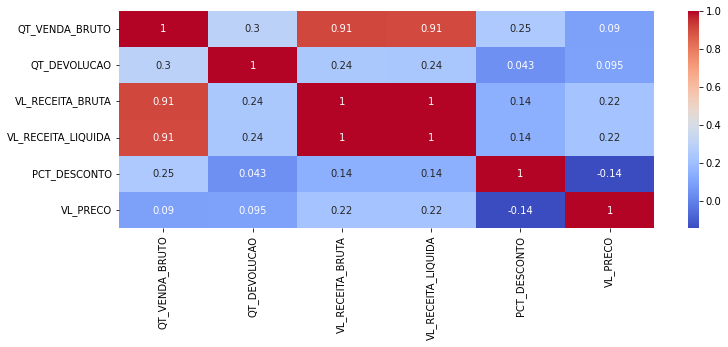

In [23]:
# Criando e plotando a matriz de correlação
corr_matrix = data[quanti_features].corr()

fig, ax = plt.subplots(figsize = (12,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

Na matriz acima é possível observar que não existe correlação significativa entre a variável `VL_PRECO` (TARGET) e as demais variáveis, indicando que não existe uma relação linear entre tais variáveis. No entanto, é possível observar casos de _multicolinearidade_, onde as variáveis `VL_RECEITA_BRUTA`, `VL_RECEITA_LIQUIDA` e `QT_VENDA_BRUTO` possuem uma alta correlação entre si, devido as suas naturezas, e não possuem correlação com a variável TARGET.

A ausência de uma relação linear entre as variáveis _explicativas_ e a variável _dependente_ fica ainda mais clara quando visualizamos os _plots_ abaixo. Dessa forma, é possível concluir que será necessário utilizar modelos não lineares para encontrar uma relação capaz de explicar o comportamento da variável `VL_PRECO` em função das demais variáveis.

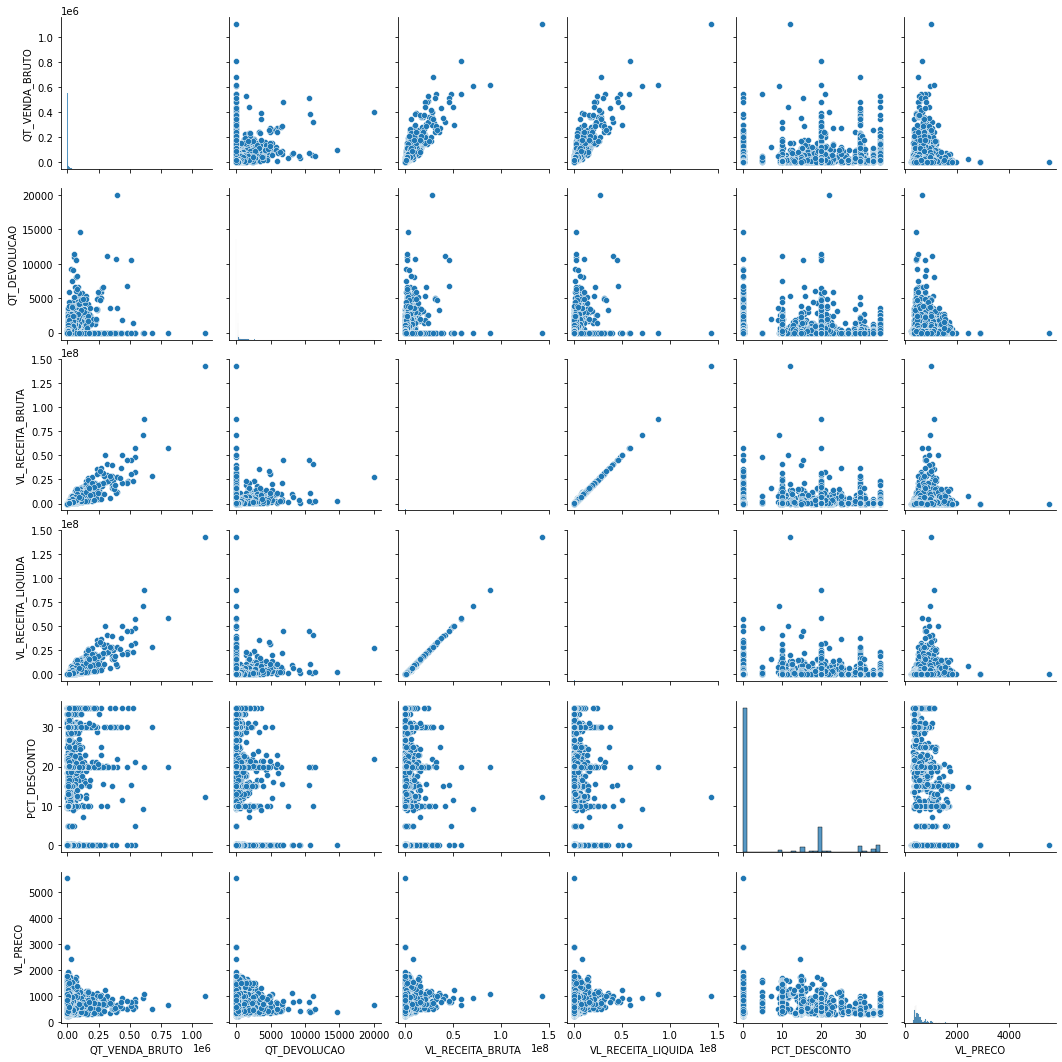

In [24]:
sns.pairplot(data[quanti_features].sample(frac=0.10))
plt.show()

### Variável TARGET ("VL_PRECO")

Antes de aprofundarmos a análise, também é importante analisar isoladamente a variável TARGET para tentar entender seu comportamento de forma mais clara.

Sendo assim, as células abaixo possuem como objetivo principal visualizar a distribuição de tal variável e analisar seu comportamento.

In [26]:
data["VL_PRECO"].describe()

count    173923.000000
mean        543.703809
std         243.974723
min         234.060000
25%         389.400000
50%         461.400000
75%         593.400000
max        5539.620000
Name: VL_PRECO, dtype: float64

#### Distribuição de Valores

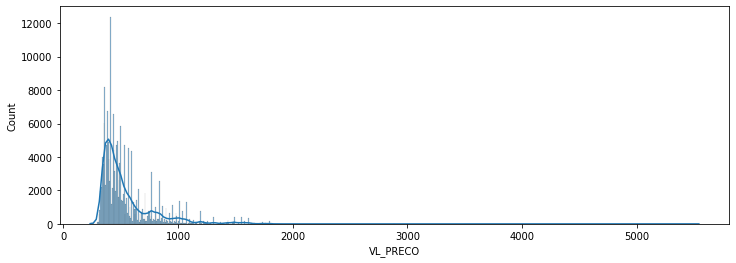

In [28]:
fig, ax = plt.subplots(figsize = (12,4))
sns.histplot(data["VL_PRECO"], kde=True)
plt.show()

É possível observar no gráfico de distribuição acima que existem alguns _outliers_ (valores extremos) em tal variável. “Um outlier é uma observação que se diferencia tanto das demais observações que levanta suspeitas de que aquela observação foi gerada por um mecanismo distinto” (Hawkins, 1980), em outras palavras os outliers são dados que se distanciam radicalmente de todos os outros. São pontos fora da curva normal, valores que fogem da normalidade e que podem causar desequilíbrio nos resultados obtidos.

Dependendo da natureza desse tipo de dado, a modelagem do modelo pode ser impactada negativamente. Sendo assim, caso se mostre necessário, será preciso realizar uma análise mais detalhada para lidar adequadamente com esses valores.

Por ora, optarei por visualizar os dados em um _boxplot_ sem omitir os _outliers_.

#### Visualizando Outliers

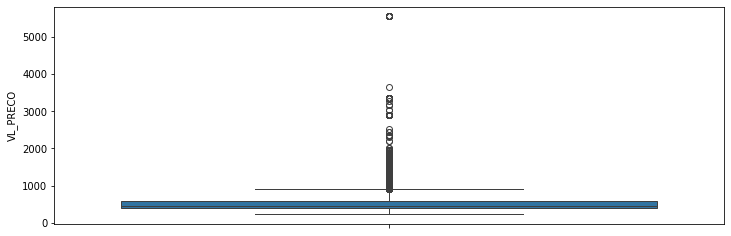

In [168]:
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(data["VL_PRECO"])
plt.show()

#### Distribuição de Valores (Com Filtro)

O _plot_ abaixo ilustra a distribuição da variável TARGET com um filtro aplicado (valores < 1000). 

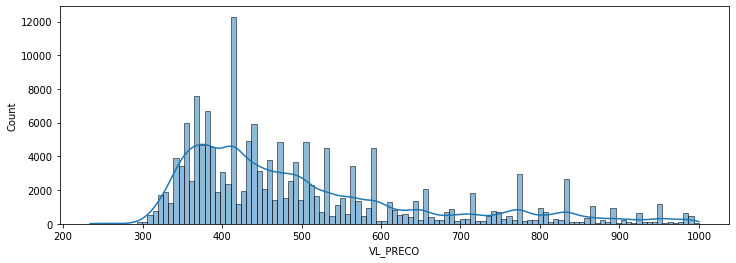

In [30]:
fig, ax = plt.subplots(figsize = (12,4))
sns.histplot(data.loc[data["VL_PRECO"] < 1000]["VL_PRECO"], kde=True)
plt.show()

Através do _plot_ acima, podemos concluir o seguinte:
- A distribuição dos dados não é aderente a uma distribuição normal;
- Trata-se de uma distribuição assimetricamente positiva.

Essas conclusões reforçam mais ainda a necessidade de utilizar um modelo não linear para explicar a variável dependente.

# Variáveis Qualitativas

Agora chegou o momento de analisarmos as 12 variáveis qualitativas presentes no conjunto de dados. Como estamos lidando com um problema de regressão, no qual queremos estimar uma variável contínua, será necessário aplicar algum tipo de transformação, como operações _dummy_, nessas variáveis antes de estimarmos algum modelo.

Contudo, antes de realizar qualquer transformação, é importante analisarmos o comportamento dos dados.

## Pré-processamento

In [37]:
# Separando variáveis qualitativas
quali_features = list(data_dict.loc[data_dict['Tipo Variável'].isin(['Ordinal', 'FLAG', 'Categórica'])]['Feature'].values)
quali_features[1] = "FLG_DATA"

In [38]:
quali_features

['COD_CICLO',
 'FLG_DATA',
 'COD_MATERIAL',
 'COD_CANAL',
 'DES_CATEGORIA_MATERIAL',
 'DES_MARCA_MATERIAL',
 'COD_REGIAO',
 'FLG_CAMPANHA_MKT_A',
 'FLG_CAMPANHA_MKT_B',
 'FLG_CAMPANHA_MKT_C',
 'FLG_CAMPANHA_MKT_D',
 'FLG_CAMPANHA_MKT_E']

In [39]:
# Atribuindo o tipo correto às variáveis qualitativas
data[quali_features] = data[quali_features].astype("object")

## Análise das Variáveis

### Análise Descritiva

In [42]:
data[quali_features].describe()

,COD_CICLO,FLG_DATA,COD_MATERIAL,COD_CANAL,DES_CATEGORIA_MATERIAL,DES_MARCA_MATERIAL,COD_REGIAO,FLG_CAMPANHA_MKT_A,FLG_CAMPANHA_MKT_B,FLG_CAMPANHA_MKT_C,FLG_CAMPANHA_MKT_D,FLG_CAMPANHA_MKT_E
count,173923,173923,173923,173923,173923,173923,173923,173923,173923,173923,173923,173923
unique,53,2,2252,2,6,85,2,2,2,2,2,1
top,202101,0,425172,anon_S0,anon_S2,anon_S8,anon_S1,0,0,0,0,0
freq,3708,123621,212,87164,44292,35297,87700,170974,125331,165937,161230,173923


### Teste Estatístico X²

Assim como podemos analisar a correlação entre variáveis quantitativas, também é possível realizar uma análise análoga em variáveis quantitativas efetuando uma análise de correspondência. No entanto, antes de realizar esse tipo de análise, é importante verificar se existe alguma associação entre as variáveis quantitativas em questão.

Para isso, é possível utilizar o teste estatístico _X²_ para variáveis qualitativas, o qual verifica se a frequência com que um determinado acontecimento observado em uma amostra se desvia significativamente ou não da frequência com que ele é esperado. Em outras palavras, o teste verificar se existe ou não associação entre pares de variáveis categóricas.

In [44]:
# Analisando variáveis qualitativas e selecionando apenas pares estatisticamente significantes
significant_cols = []
for item in list(combinations(quali_features, 2)):
    # print(item, "\n")
    table = pd.crosstab(data[item[0]], data[item[1]])
    
    # print(f"{item[0]} x {item[1]}")
    
    chi2, pvalue, gl, freq_esp = chi2_contingency(table)

    # print(f"estatística qui²: {round(chi2, 2)}")
    # print(f"p-valor da estatística: {round(pvalue, 4)}", "\n")
    
    if pvalue <= 0.05:
        if item[0] not in significant_cols:
            significant_cols.append(item[0])
            
        if item[1] not in significant_cols:   
            significant_cols.append(item[1])

In [45]:
significant_cols

['COD_CICLO',
 'FLG_DATA',
 'COD_MATERIAL',
 'DES_CATEGORIA_MATERIAL',
 'DES_MARCA_MATERIAL',
 'FLG_CAMPANHA_MKT_A',
 'FLG_CAMPANHA_MKT_B',
 'FLG_CAMPANHA_MKT_C',
 'FLG_CAMPANHA_MKT_D',
 'COD_CANAL',
 'COD_REGIAO']

Acima estão ilustradas as variáveis qualitativas que apresentaram associação com pelo menos uma outra variável do conjunto de dados. Sendo assim, utilizaremos apenas essas variáveis durante a análise de correspondência.

### Análise de Correspondência Múltipla (MCA)

A análise de correspondência múltipla tem como objetivo verificar a associação entre variáveis e também identificar a proximidade dessas variáveis em um mapa perceptual. Esse tipo de análise não influência a escolha de um modelo de regressão ou sua modelagem, visto que, estou analisando apenas as variáveis qualitativas e suas relações entre si, excluindo a variável TARGET.

No entanto, é interessante realizar esse tipo de análise para conhecer melhor os dados.

In [47]:
mca = prince.MCA(n_components=len(significant_cols)).fit(data[significant_cols])

In [48]:
eigenvalues_table = mca.eigenvalues_summary

In [49]:
eigenvalues_table

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,0.260,0.12%,0.12%
1,0.232,0.11%,0.23%
2,0.215,0.10%,0.32%
3,0.207,0.10%,0.42%
4,0.198,0.09%,0.51%
5,0.186,0.09%,0.60%
6,0.184,0.08%,0.68%
7,0.182,0.08%,0.76%
8,0.182,0.08%,0.85%


A tabela acima ilustra o percentual de variância que cada fator/componente armazena. No cenário acima, cada fator representa uma variável qualitativa do conjunto de dados e, caso fosse necessário diminuir o número de variáveis, poderíamos utilizar o percentual de variância acumulada para definir quantos fatores (variáveis) utilizar numa análise final.

Como nenhum dos componentes armazena variância de forma significativa para explicar os dados, devido a presença de outras variáveis (quantitativas) no conjunto de dados, nenhuma variável qualitativa será descartada. Além disso, como existe um número considerável de categórias, não realizarei o _plot_ do mapa perceptual.

In [50]:
obs_coords = mca.row_coordinates(data[significant_cols])

In [51]:
obs_coords["VL_PRECO"] = data["VL_PRECO"]

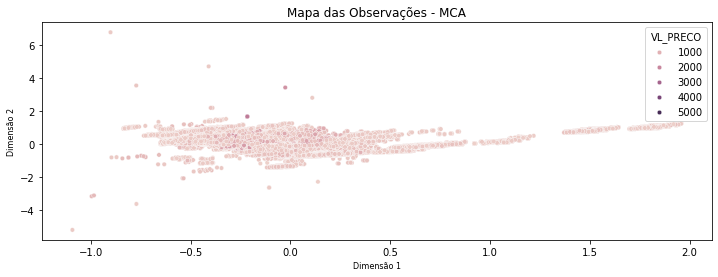

In [52]:
fig, ax = plt.subplots(figsize = (12,4))
sns.scatterplot(data=obs_coords, x=0, y=1, hue='VL_PRECO', s=20)
plt.title("Mapa das Observações - MCA", fontsize=12)
plt.xlabel("Dimensão 1", fontsize=8)
plt.ylabel("Dimensão 2", fontsize=8)
plt.show()

O _plot_ acima foi feito com base nas coordenadas espaciais geradas para cada variável qualitativa presente no conjunto de dados utilizando a MCA. Esse tipo de técnica é util quando queremos converter variáveis qualitativas em variáveis quantitativas sem cometer ponderação arbitrária.

In [53]:
obs_coords.columns = significant_cols + ["VL_PRECO"]
obs_coords

,COD_CICLO,FLG_DATA,COD_MATERIAL,DES_CATEGORIA_MATERIAL,DES_MARCA_MATERIAL,FLG_CAMPANHA_MKT_A,FLG_CAMPANHA_MKT_B,FLG_CAMPANHA_MKT_C,FLG_CAMPANHA_MKT_D,COD_CANAL,COD_REGIAO,VL_PRECO
0,-0.055947,-0.659821,0.194551,0.222322,0.208142,-1.345467,0.056281,-0.451179,0.160428,0.444923,0.288069,455.40
1,-0.072017,-0.591647,0.309597,0.177047,-0.129282,-0.002650,0.148204,-0.253743,-0.963298,-0.210100,-0.024975,773.40
2,-0.364362,0.138583,-0.398935,-0.206433,0.014308,-0.239907,0.119946,-0.032368,0.047982,-0.056761,0.274415,341.40
3,0.151242,-0.685267,-0.019091,0.179393,0.140299,0.143472,-0.007871,0.098803,-0.039077,0.066023,-0.045462,450.90
4,-0.344064,0.202896,-0.582630,-0.164437,0.319019,-0.314917,-0.326729,-0.292140,-0.085841,0.142287,0.098559,431.40
...,...,...,...,...,...,...,...,...,...,...,...,...
173918,-0.321769,0.158051,-0.356330,-0.282127,0.034865,-0.786104,0.222065,-0.234849,0.144142,-0.324168,0.545133,389.40
173919,0.092103,-0.665388,-0.069543,0.175638,-0.603569,0.004296,0.294851,-0.056642,0.130939,-0.024694,0.006998,490.32
173920,-0.348925,0.229932,0.331334,-0.282236,-0.006707,-0.096436,0.224890,0.126754,0.569380,0.044667,-0.432451,724.38
173921,-0.150233,-0.324689,-0.088707,-0.002923,-0.227400,0.062038,-0.086054,0.098047,0.517253,0.044721,-0.433623,491.40


# Pré-Processamento Geral

Por fim, após realizar uma análise geral de cada tipo de variável, é hora de preparar os dados para serem utilizados durante a estimação de modelos de regressão. 

- Para as variáveis quantitativas, o processo de padronização pela subtração da média e divisão pelo desvio padrão será realizado para garantir que as variáveis se situem em escalas próximas, facilitando o processo de aprendizagem do modelo.

- Para as variáveis qualitativas, o processo de criação de variáveis dummies será efetuado para garantir que tais _features_ sejam interpretadas da maneira correta pelos modelos de regressão, os quais trabalham com variáveis quantitativas.

Por último, os dados serão salvos em uma estrutura _parquet_ para uso posterior.

## Padronização dos Dados

In [56]:
# Padronizando os dados
preprocessed_data = data.copy()
preprocessed_data[quanti_features] = StandardScaler().fit_transform(data[quanti_features])

In [57]:
preprocessed_data.describe()

,QT_VENDA_BRUTO,QT_DEVOLUCAO,VL_RECEITA_BRUTA,VL_RECEITA_LIQUIDA,PCT_DESCONTO,VL_PRECO
count,1.739230e+05,1.739230e+05,1.739230e+05,1.739230e+05,1.739230e+05,1.739230e+05
mean,4.739049e-18,-1.086713e-17,-2.941479e-17,3.080382e-17,7.762235e-19,1.374324e-16
std,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00
min,-3.086128e-01,-4.341223e-01,-2.319759e-01,-2.308795e-01,-5.996371e-01,-1.269167e+00
25%,-3.037608e-01,-4.341223e-01,-2.297771e-01,-2.287074e-01,-5.996371e-01,-6.324600e-01
50%,-2.534533e-01,-2.196912e-02,-2.079129e-01,-2.069981e-01,-5.996371e-01,-3.373466e-01
75%,-5.619059e-02,4.143907e-02,-1.077660e-01,-1.076962e-01,7.616310e-01,2.036946e-01
max,5.575763e+01,5.533338e+01,8.192184e+01,8.221750e+01,2.576655e+00,2.047725e+01


In [118]:
# Salvando o objeto de padronização para uso posterior
with open('scaler.pickle', 'wb') as handle:
    pickle.dump(StandardScaler().fit(data[quanti_features]), handle, protocol=pickle.HIGHEST_PROTOCOL)

## Criação de Variáveis Dummy

In [59]:
cols_to_dummy = [
    "COD_CICLO", 
    "COD_MATERIAL", 
    "COD_CANAL", 
    "DES_CATEGORIA_MATERIAL", 
    "DES_MARCA_MATERIAL",
    "COD_REGIAO"]

In [60]:
# Criando variáveis dummies
preprocessed_data = pd.get_dummies(preprocessed_data, columns=cols_to_dummy,
                                      dtype=int,
                                      drop_first=True)

In [61]:
preprocessed_data

,FLG_DATA,QT_VENDA_BRUTO,QT_DEVOLUCAO,VL_RECEITA_BRUTA,VL_RECEITA_LIQUIDA,FLG_CAMPANHA_MKT_A,FLG_CAMPANHA_MKT_B,FLG_CAMPANHA_MKT_C,FLG_CAMPANHA_MKT_D,FLG_CAMPANHA_MKT_E,...,DES_MARCA_MATERIAL_anon_S87,DES_MARCA_MATERIAL_anon_S88,DES_MARCA_MATERIAL_anon_S89,DES_MARCA_MATERIAL_anon_S9,DES_MARCA_MATERIAL_anon_S90,DES_MARCA_MATERIAL_anon_S91,DES_MARCA_MATERIAL_anon_S92,DES_MARCA_MATERIAL_anon_S93,DES_MARCA_MATERIAL_anon_S94,COD_REGIAO_anon_S10
0,1,0.042982,0.295072,-0.077293,-0.075642,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,-0.299433,0.009735,-0.222117,-0.220986,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1.307519,2.049365,0.112996,0.115330,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,-0.302499,-0.434122,-0.229333,-0.228227,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,-0.232717,-0.011401,-0.202194,-0.200991,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173918,1,-0.187459,-0.434122,-0.195461,-0.194234,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
173919,1,-0.098564,-0.434122,-0.126015,-0.124539,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
173920,1,-0.304843,-0.434122,-0.228291,-0.227182,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
173921,0,-0.304121,-0.434122,-0.230066,-0.228963,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
# Salvando os dados pré-processados para uso posterior
preprocessed_data.to_parquet("preprocessed_dataset.parquet", engine="pyarrow")

# Próximos Passos
A análise exploratória e descritiva dos dados foi finalizada. Sendo assim, agora é hora de explorar possíveis modelos para resolverem o problema proposto.